The previous two notebooks collated a collection of bibliometric records for analysis, 
followed by an initial filtering to constrain the number of publications as much as possible.

In this notebook we constrain the number of publications as much as possible based on identification of relevant topics and study areas

In [1]:
%run "Common Setup.ipynb"

In [2]:
filtered_RC = wosis.load_query_results('{}/initial_filtered_corpora.txt'.format(TMP_DIR))
num_records = []

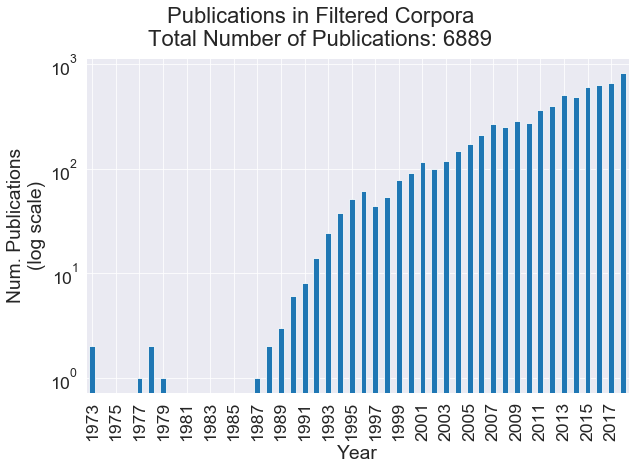

In [3]:
wos_plot.plot_pub_trend(filtered_RC, title='Publications in Filtered Corpora', 
                        save_plot_fn='{}/initial_pub_trend'.format(FIG_DIR))

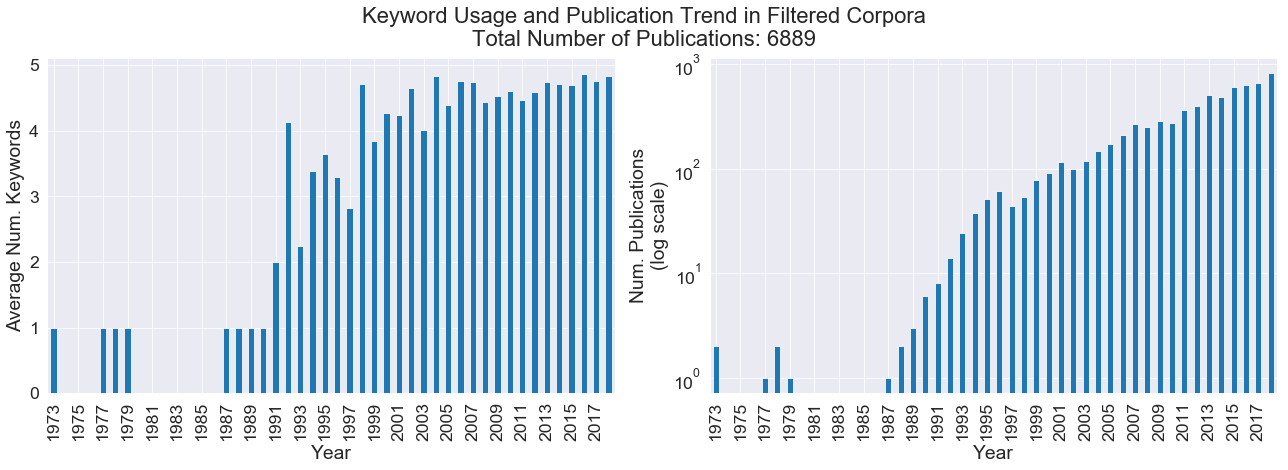

In [4]:
wos_plot.plot_kw_trend(filtered_RC, title='Keyword Usage and Publication Trend in Filtered Corpora', 
                       save_plot_fn='{}/num_kw_per_pub'.format(FIG_DIR))

<hr>

Identify papers which touch on software practices in Integrated Environmental Modeling

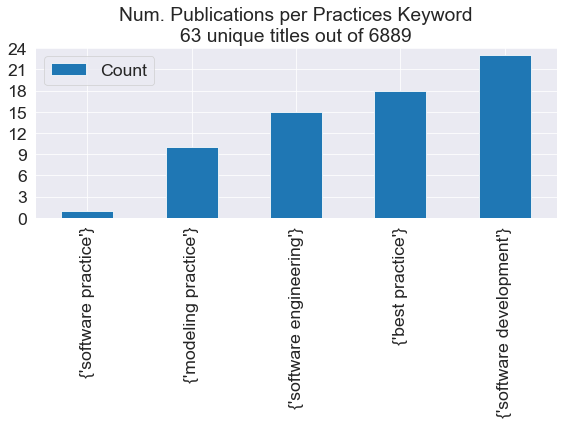

In [5]:
keywords = set(["software practice", "software development", "software engineering", "best practice", "modeling practice"])

search_results = wosis.search_records(filtered_RC, keywords, threshold=95.0)

matches = wosis.keyword_matches(search_results, keywords, 95.0)

wos_plot.plot_pub_per_kw(matches.recs, matches.summary, filtered_RC, 'Practices', 
                         save_plot_fn='{}/pubs_per_practices_kw'.format(FIG_DIR))

The identified phrases are exported and manually combed through to identify relevant articles.

In [6]:
all_practice_pubs = matches.combine_recs()

# Summarize the text, picking out sentences which include the indicated keywords
prac_phrases = wosis.find_phrases(all_practice_pubs, weighted_keywords=['software', 'software development', 'software engineering'])

prac_phrases.all_phrases.to_csv('{}/all_practice_phrases.csv'.format(DATA_DIR))

In this context, any publication that speaks of software development in integrated environmental modeling, or the role these play in modelling in general, is marked as relevant with a simple "Yes".

Those that could were not, or could not be examined, are marked with "No". In some cases there may be papers that are not relevant to the study at all, and these are also marked with a "No".

Where relevance could not be determined is marked with a "?".

In [7]:
sorted_prac_pubs = pd.read_csv('{}/all_practice_phrases_relevance.csv'.format(DATA_DIR))

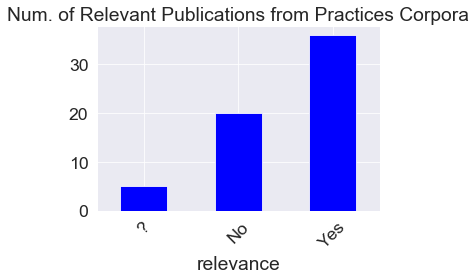

In [8]:
ordered_results = sorted_prac_pubs.sort_values('relevance')[::-1]
grouped_count = ordered_results.groupby('relevance')['title'].count()
grouped_count.plot(kind='bar', rot=45, color='b')

plt.title('Num. of Relevant Publications from Practices Corpora')
plt.tight_layout()
plt.savefig('{}/relevant_practices_pubs.png'.format(FIG_DIR), dpi=300, bbox_inches="tight")

In [9]:
grouped_count

relevance
?       5
No     20
Yes    36
Name: title, dtype: int64

In [10]:
relevant_pubs = ordered_results.loc[ordered_results['relevance'].str.contains('Yes') == True, :]

# Remove year helpfully added to title and extract from RecordCollection
titles = [' '.join(title.split(' ')[:-1]) for title in relevant_pubs['title'].tolist() ]

In [11]:
relevant_rc = wosis.find_pubs_by_title(filtered_RC, titles)

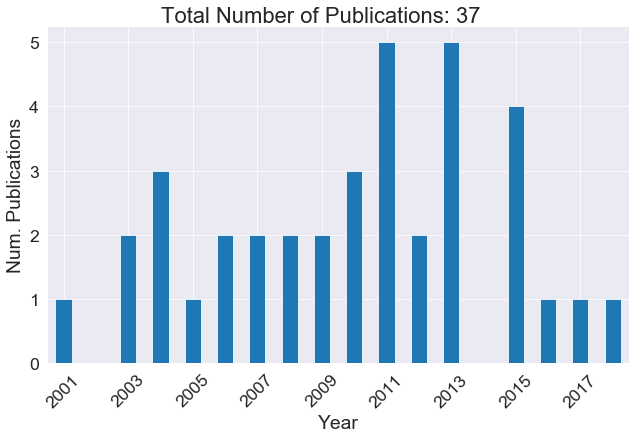

In [12]:
wos_plot.plot_pub_trend(relevant_rc)

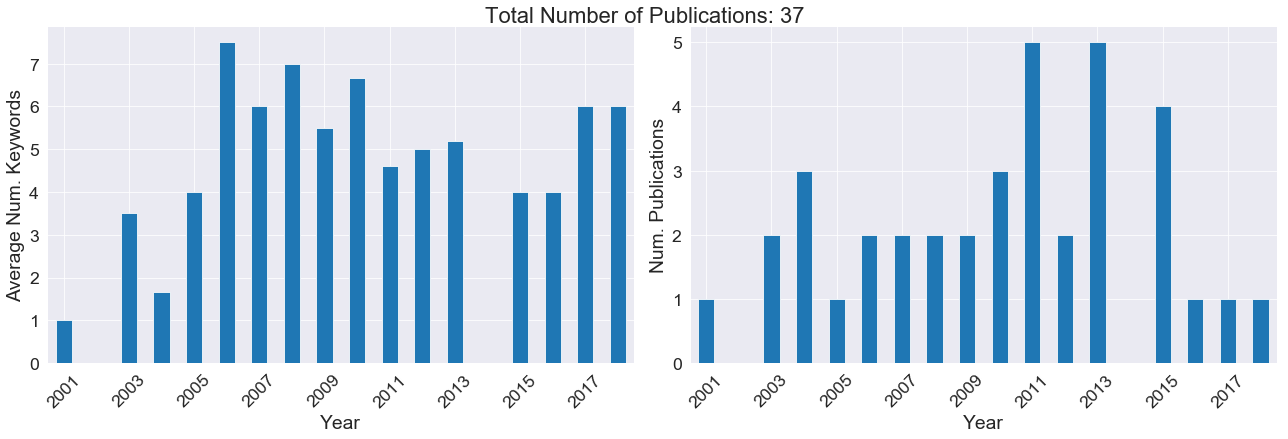

In [14]:
wos_plot.plot_kw_trend(relevant_rc)

In [13]:
# Calculate yearly average
wosis.rc_to_df(relevant_rc).groupby('year').count()['title'].mean()

2.3125

<hr>

In [54]:
keywords = set(["software development"])

search_results = wosis.search_records(filtered_RC, keywords, threshold=95.0)

matches = wosis.keyword_matches(search_results, keywords, 95.0)

# wos_plot.plot_pub_per_kw(matches.recs, matches.summary, filtered_RC, 'Practices', 
#                          save_plot_fn='{}/pubs_per_practices_kw'.format(FIG_DIR))

In [55]:
len(matches.combine_recs())

23

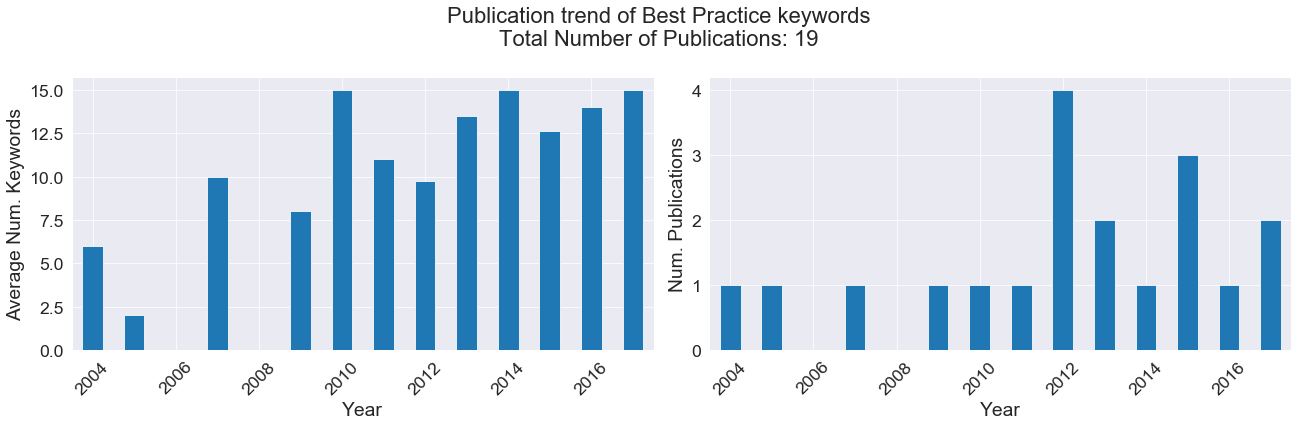

In [8]:
wos_plot.plot_kw_trend(search_results, title='Publication trend of Best Practice keywords', 
                       save_plot_fn='figs/num_kw_per_best_practice_pub.png')

<hr>

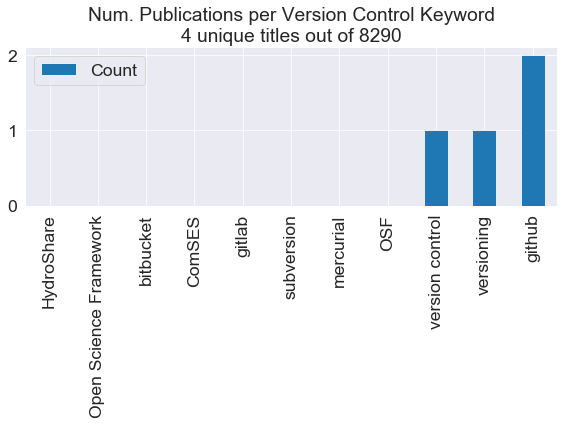

In [9]:
keywords = set(["version control", "versioning", 'github', 'gitlab', 'bitbucket', 'OSF', 'Open Science Framework', 'subversion', 'mercurial', 'ComSES', 'HydroShare'])

search_results = search_records(RC, keywords, threshold=95.0)
ind_recs, summary = keyword_matches(search_results, keywords, 95.0)
wos_plot.plot_pub_per_kw(ind_recs, summary, RC, 'version control', save_plot_fn='figs/pubs_per_vc_kw.png')

<hr>

In [10]:
ind_recs, summary = keyword_matches(RC, keywords, 95.0)
preview_matches_by_keyword(ind_recs)

Keyword: version control
  Title: Integrated Land Systems Modelling and Optimisation
  Authors: Herzig, A.; Rutledge, D.; Piantadosi, J; Anderssen, RS; Boland, J
  Journal: 20Th International Congress On Modelling And Simulation (Modsim2013)
  Year: 2013
  -----------------------------------------------
Keyword: versioning
  Title: Cooperative and integrated workflow and document management for engineering applications
  Authors: Joeris, G; Wagner, RR
  Journal: Eighth International Workshop On Database And Expert Systems Applications, Proceedings
  Year: 1997
  -----------------------------------------------
Keyword: github
  Title: Integrated Modeling of Survival Data from Multiple Stressor Ecotoxicology Experiments
  Authors: Proctor, Abigael H.; King, Catherine K.; Holan, Jessica R.; Wotherspoon, Simon J.
  Journal: Environmental Science & Technology
  Year: 2017
  -----------------------------------------------
  Title: APSIM Next Generation: The final frontier?
  Authors: Holzwor

In [11]:
# if len(search_results) > 0:
#     df = pd.DataFrame(search_results.timeSeries('year'))
#     df.set_index('year', drop=True, inplace=True)
#     df.sort_index(inplace=True)
#     df.loc[:, ['count']].plot(kind='bar', rot=45, title='Publications per Year');
#     df.loc[:, ['count']].cumsum().plot(kind='bar', rot=45);

In [12]:
# Journals in results
# journals = pd.DataFrame(search_results.forNLP(extraColumns=['SO']))

# journals.loc[:, 'SO'] = [x[0] for x in journals.loc[:, 'SO'].str.split('-')]
# top_ten = journals.groupby('SO').count().sort_values('year', ascending=False)[0:10].index.tolist()

# subset = journals.groupby(['SO', 'year']).size().unstack().T

# active_journals = subset.sum().sort_values(ascending=False)[0:10].index.tolist()

# journals_of_interest = subset.loc[:, active_journals]
# axes = journals_of_interest.plot(kind='bar', subplots=True, 
#                                  ylim=(0, subset.max().max() + 10), 
#                                  title=['Publication Trend\n(First 10 Journals by Publication)'] + ['', ] * min(9, len(active_journals) - 1), 
#                                  figsize=(14,10))

# for ax in axes:
#     ax.legend(bbox_to_anchor=(1.03, 1))

<hr>

In [13]:
import networkx as nx

2348 out of 8290 (28.32%)


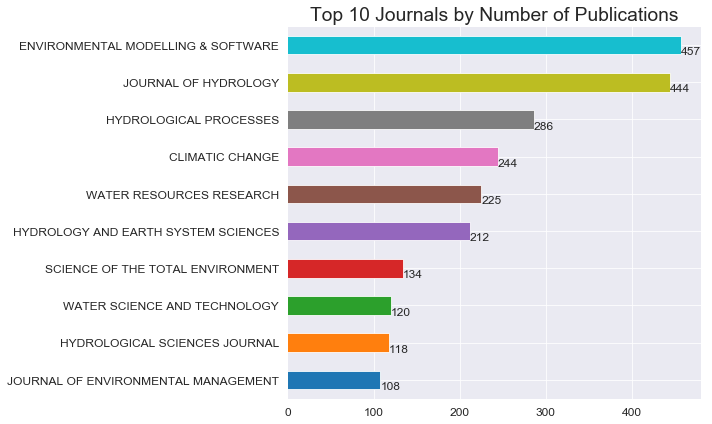

In [14]:
wos_plot.plot_pubs_per_journal(RC, annotate=True, save_plot_fn='figs/top_journals_by_pub.png')

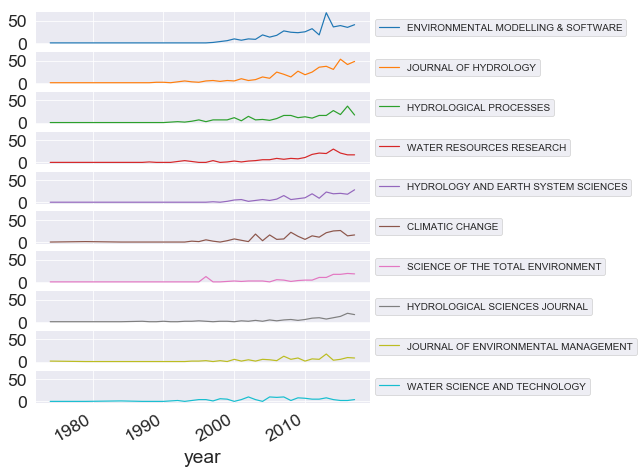

In [15]:
wos_plot.plot_journal_pub_trend(RC)

In [18]:
criteria = {
    'overarching': set(['uncertainty', 'adapt', 'decision support', 'management', 'gis']),
    'agri': set(['agricu', 'farm']),
    'water': set(['hydrol', 'water', 'stream', 'aquifer']),
    'enviro': set(['environment', 'climate', 'ecolo', 'ecosys', 'biodivers']),
    'socio_economic': set(['ecosystem service', 'social', 'conflict', 'particip', 'law', 'stakehold', 'policy', 'economic'])
}

crit_matches, crit_summary = wosis.analysis.search.keyword_matches_by_criteria(RC, criteria, threshold=95.0)

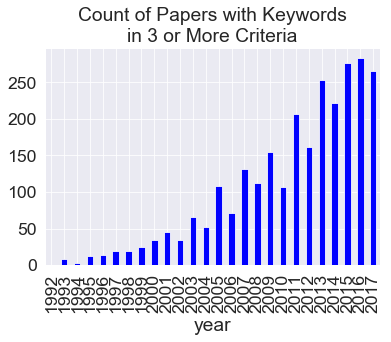

In [19]:
corpora_df = wosis.analysis.search.collate_keyword_criteria_matches(RC, crit_matches)
wos_plot.plot_criteria_trend(corpora_df)

<hr>

In [16]:
# Top 10 papers count
paper_citations = pd.DataFrame(RC.localCiteStats(pandasFriendly=True))
paper_citations = paper_citations.set_index('Citations', drop=True)
paper_citations.sort_values(by='Counts', ascending=False)[0:10]  # .plot(kind='barh')

,Counts
Citations,
"Beven, K, 2002, Towards an alternative blueprint for a physically based digitally simulated hydrologic response modelling system, HYDROLOGICAL PROCESSES, 16, 189, 400134",965
"Nash, J. E., 1970, River flow forecasting through conceptual models: Part 1. A discussion of principles, Journal of Hydrology, 10, 282, 281488",725
"Arnold, JG, 2005, SWAT2000: current capabilities and research opportunities in applied watershed modelling, HYDROLOGICAL PROCESSES, 19, 563, 502260",533
"Jakeman, AJ, 2003, Integrated assessment and modelling: features, principles and examples for catchment management, ENVIRONMENTAL MODELLING & SOFTWARE, 18, 491, 41702207",316
"van Vuuren, Detlef P., 2011, A special issue on the RCPs, CLIMATIC CHANGE, 109, 1, 425578948",266
"Beven, KJ, 1979, A physically based, variable contributing area model of basin hydrology, Hydrological Sciences Journal, 24, 43, 279720",246
"Refsgaard, JC, 1997, Parameterisation, calibration and validation of distributed hydrological models, JOURNAL OF HYDROLOGY, 198, 69, 5666635",245
"Allen, R. G., 1998, Crop evapotranspiration: guidelines for computing crop water requirements., FAO Irrigation and Drainage Paper, 344487109",232
"ABBOTT, MB, 1986, AN INTRODUCTION TO THE EUROPEAN HYDROLOGICAL SYSTEM - SYSTEME HYDROLOGIQUE EUROPEEN, SHE .2. STRUCTURE OF A PHYSICALLY-BASED, DISTRIBUTED MODELING SYSTEM, JOURNAL OF HYDROLOGY, 87, 61, 169718",231


In [17]:
# Authors with most citations (careful interpreting this - author names are grouped by surname so it is misleading)
author_citations = pd.DataFrame(RC.localCiteStats(pandasFriendly=True, keyType='author'))
author_citations.set_index('Citations', drop=True, inplace=True)

In [18]:
author_citations.sort_values(by='Counts', ascending=False).head(10)

,Counts
Citations,
Beven,1734
Zhang,1321
Wang,1287
Chen,1203
Li,1185
Liu,1109
Smith,1030
Nash,801
Arnold,716


In [19]:
len(search_results)

4

In [20]:
# Papers cited by papers identified with version control keywords
author_citation_network = search_results.networkCitation(nodeType='full')
acn = author_citation_network
# mk.dropNodesByDegree(acn, 1)
print(mk.graphStats(acn))

Nodes: 89
Edges: 85
Isolates: 0
Self loops: 0
Density: 0.0108529
Transitivity: 0


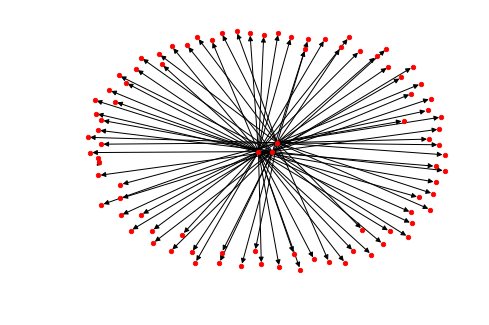

In [21]:
nx.draw_spring(acn, with_labels=False, font_size=7, node_size=20)

In [22]:
author_citation_network = search_results.networkCitation(nodeType='full')
acn = author_citation_network
mk.dropNodesByDegree(acn, 1)
print(mk.graphStats(acn))

Nodes: 4
Edges: 0
Isolates: 4
Self loops: 0
Density: 0
Transitivity: 0


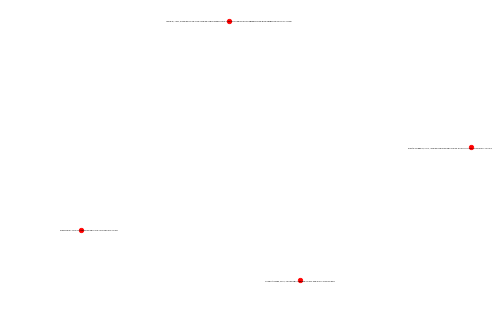

In [23]:
nx.draw_spring(acn, with_labels=True, font_size=2, node_size=20)

In [24]:
import community

## Author Citation Network

Which authors (by first author name) do authors cite?

In [25]:
author_citation_network = search_results.networkCitation(nodeType='author', directed=False)
acn = author_citation_network
print(mk.graphStats(acn))

Nodes: 70
Edges: 67
Isolates: 1
Self loops: 0
Density: 0.0277433
Transitivity: 0


In [26]:
partition = community.best_partition(acn)
modularity = community.modularity(partition, acn)
print('Modularity:', modularity)

Modularity: 0.6432114512471655


C:\UserData\takuyai\Miniconda3\envs\biblio\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


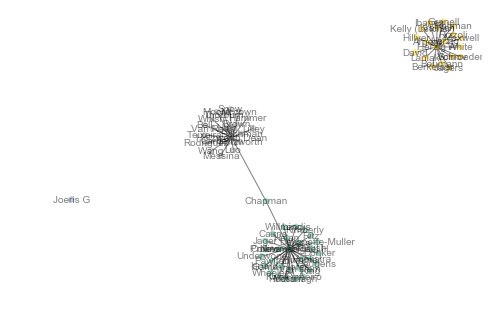

In [27]:
nx.draw_spring(acn, node_color=[partition[n] for n in acn.nodes()], 
               cmap=plt.cm.Set2, with_labels=True, font_size=10, node_size=30, alpha=0.5)

## Author Co-author

Which researchers do authors collaborate with?

In [28]:
coAuths = search_results.networkCoAuthor()  # RC.networkCoAuthor()
print(mk.graphStats(coAuths))

Nodes: 26
Edges: 137
Isolates: 0
Self loops: 0
Density: 0.421538
Transitivity: 0.96633


C:\UserData\takuyai\Miniconda3\envs\biblio\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


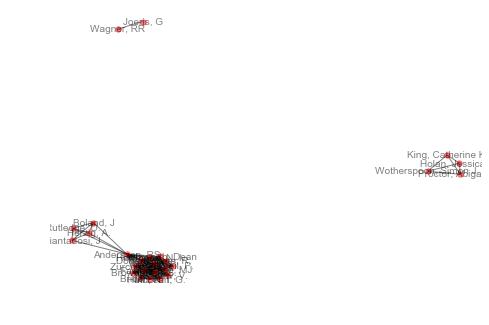

In [29]:
nx.draw_spring(coAuths, with_labels=True, font_size=10, node_size=30, alpha=0.5)

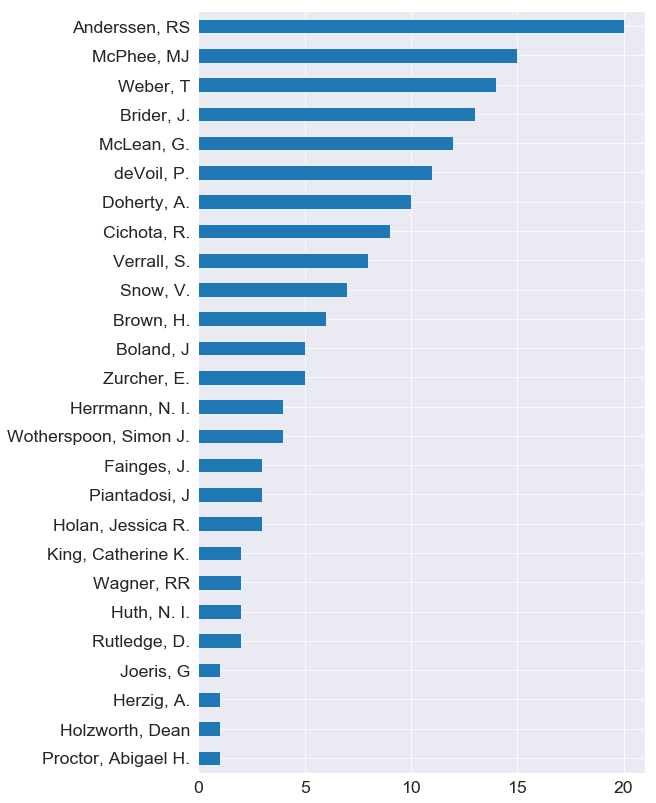

In [30]:
author_cocount = {}
co_auth_data = dict(coAuths.nodes.data())
for it in co_auth_data.items():
    author_cocount[it[0]] = it[1]['count']

author_cocount = pd.DataFrame(author_cocount, index=['Count']).T.sort_values('Count')
author_cocount.plot(kind='barh', legend=False, figsize=(8,14))

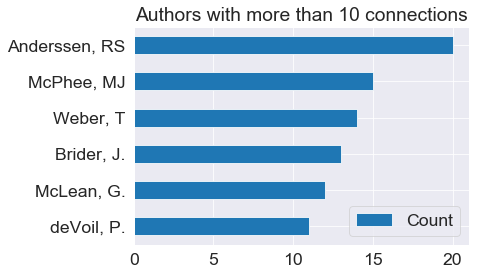

In [31]:
try:
    threshold = 10
    author_cocount.loc[author_cocount['Count'] > threshold].plot(kind='barh', title='Authors with more than {} connections'.format(threshold));
except TypeError:
    print("No data to plot")

## CoCitation (Authors)

Which two authors are commonly cited together?

In [32]:
coCites = search_results.networkCoCitation(nodeType='author')
mk.dropNodesByDegree(coCites, 1)
print(mk.graphStats(coCites))

Nodes: 66
Edges: 761
Isolates: 0
Self loops: 12
Density: 0.354779
Transitivity: 0.969358


C:\UserData\takuyai\Miniconda3\envs\biblio\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


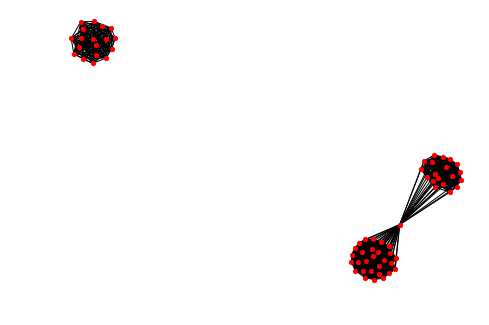

In [33]:
nx.draw_spring(coCites, with_labels=False, font_size=8, node_size=20)

<hr>

Doing the same as above for "testing" keywords

In [34]:
keywords = set(["model testing", "validation process", "model verification", "software testing", "model validation"])

search_results = search_records(RC, keywords, threshold=95.0)

print(len(search_results), "out of", len(RC))

73 out of 8286


In [35]:
ind_recs, summary = keyword_matches(RC, keywords, 95.0)
unique_titles = get_unique_kw_titles(ind_recs)
print("Number of unique titles:", len(unique_titles))

Number of unique titles: 73


In [36]:
# unique_titles

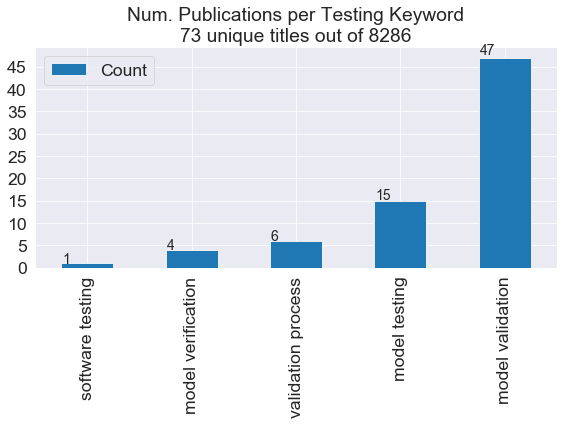

In [37]:
wos_plot.plot_pub_per_kw(ind_recs, summary, RC, 'Testing', annotate=True, save_plot_fn='figs/num_pub_per_testing_kw.png')

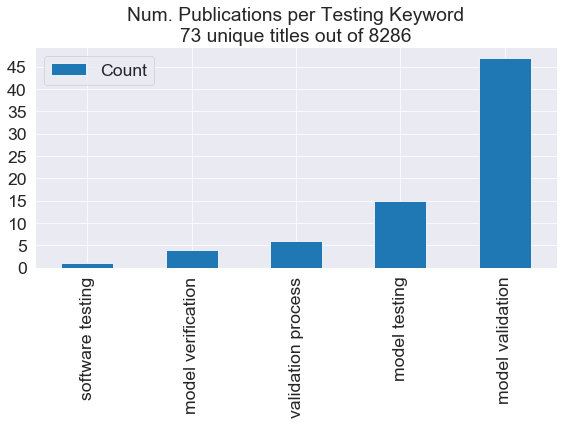

In [38]:
wos_plot.plot_pub_per_kw(ind_recs, summary, RC, 'Testing', annotate=False)

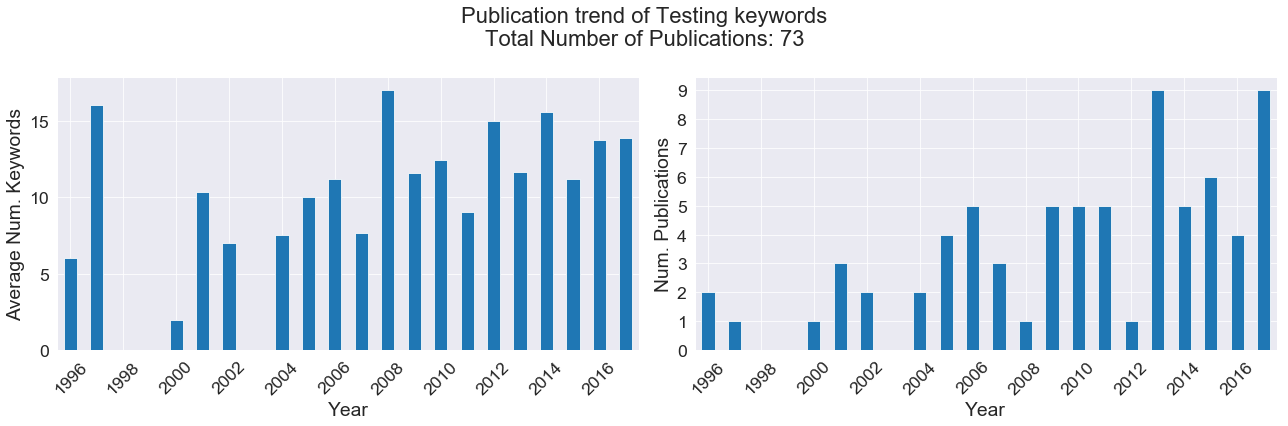

In [39]:
wos_plot.plot_kw_trend(search_results, 'Publication trend of Testing keywords', save_plot_fn='figs/num_kw_per_testing_pub.png')

<hr>

<hr>